## Proyek Akhir Mata Kuliah Jaringan Saraf Tiruan

Backpropagation Model Learning Rate Tuning

- Ahmad Zaki (225150201111025)
- Muhammad Iqbal Muzakki (225150200111028)
- Naufal Afkaar (225150201111051)

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, roc_curve, auc, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.base import BaseEstimator, ClassifierMixin
from scipy.special import softmax
import pickle
from models.BackpropagationModel import BackpropagationModel
import seaborn as sns

Read and Preprocessing Data

In [2]:
df = pd.read_csv('./data/breast-cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [3]:
df = df.drop(columns=["id"])

# 0 (Benign) dan 1 (Malignant)
df['diagnosis'] = df['diagnosis'].map({'B': 0, 'M': 1})

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    int64  
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
print(df.describe())

        diagnosis  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  569.000000   569.000000    569.000000      569.000000   569.000000   
mean     0.372583    14.127292     19.289649       91.969033   654.889104   
std      0.483918     3.524049      4.301036       24.298981   351.914129   
min      0.000000     6.981000      9.710000       43.790000   143.500000   
25%      0.000000    11.700000     16.170000       75.170000   420.300000   
50%      0.000000    13.370000     18.840000       86.240000   551.100000   
75%      1.000000    15.780000     21.800000      104.100000   782.700000   
max      1.000000    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720       

In [6]:
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

## Exploratory Data Analysis

Distribution of Target Variable

C:\Users\AHMAD ZAKI\AppData\Local\Temp\ipykernel_27144\2083290350.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='diagnosis', palette='Set2')


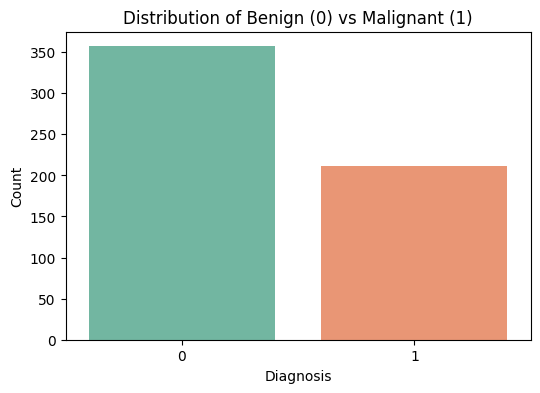

In [7]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title("Distribution of Benign (0) vs Malignant (1)")
plt.xlabel("Diagnosis")
plt.ylabel("Count")
plt.savefig('figures/distribution_diagnosis.png')
plt.show()

Correlation Heat Map

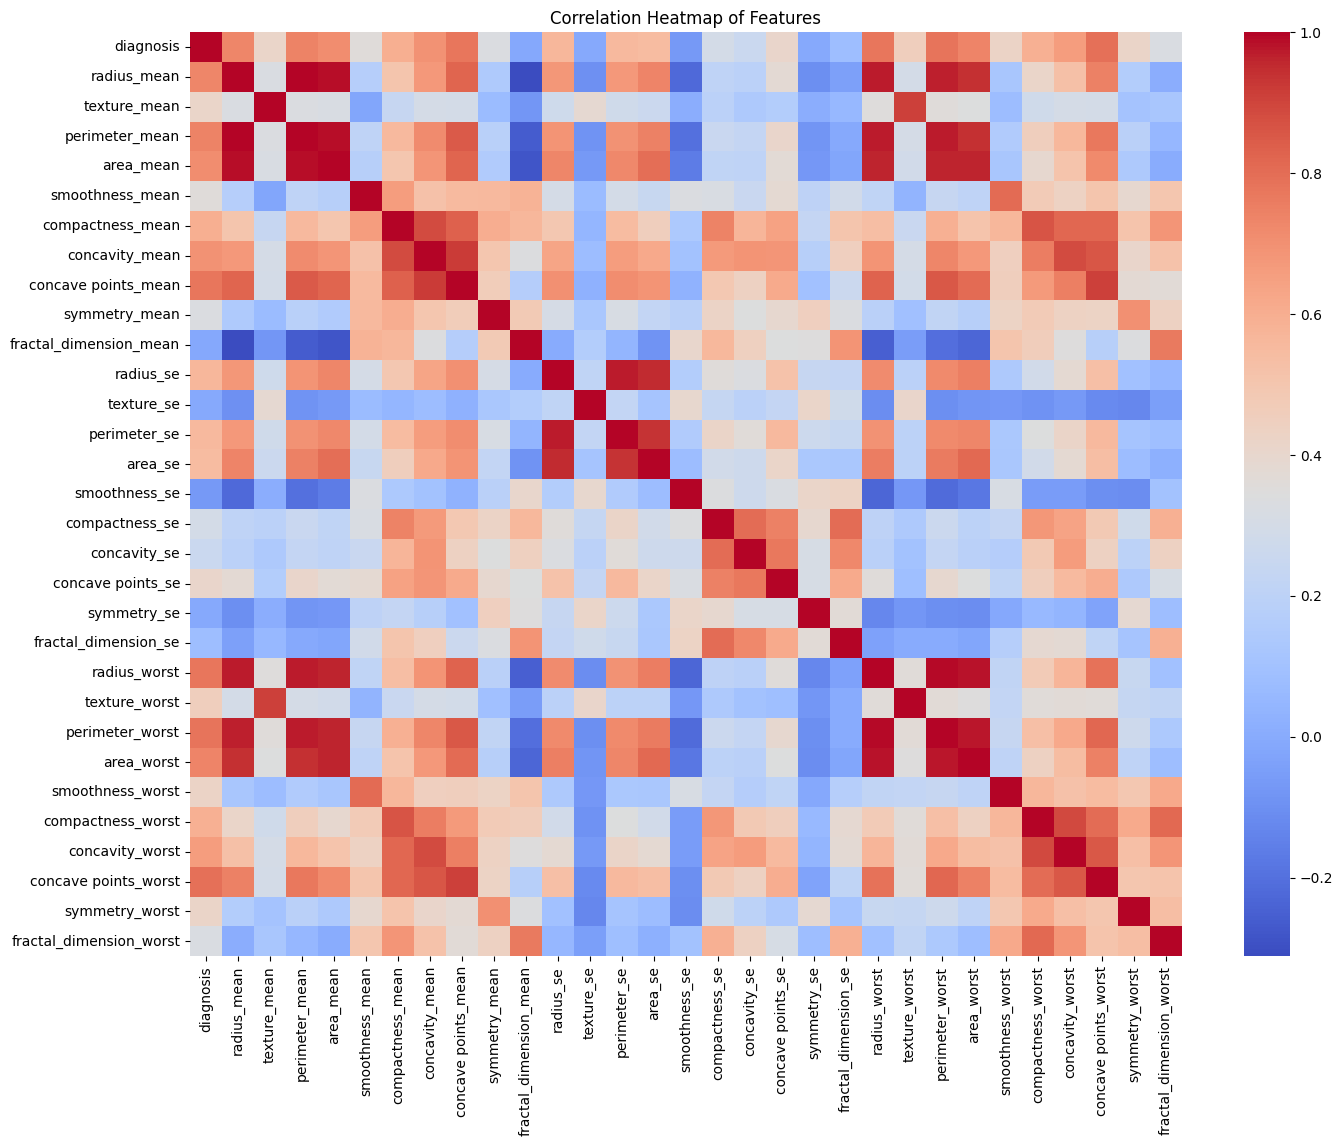

In [8]:
plt.figure(figsize=(16, 12))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Heatmap of Features")
plt.savefig('figures/correlation_heatmap.png')
plt.show()

Check pair plot 

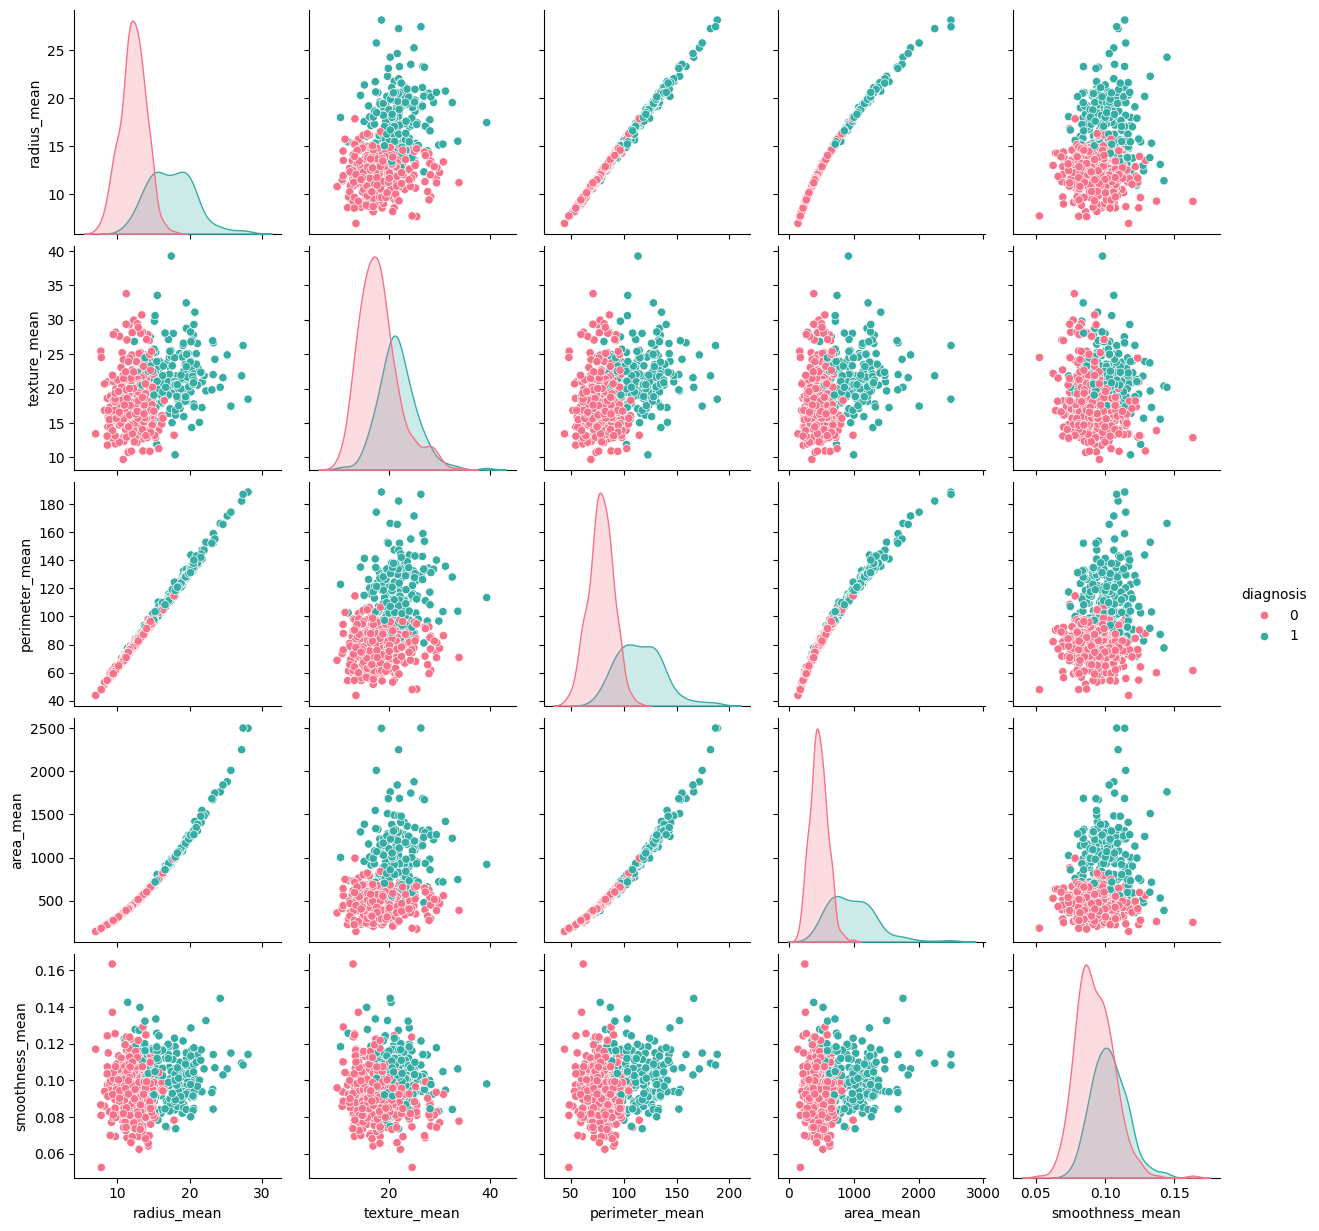

In [9]:
selected_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean', 'diagnosis']
pairplot = sns.pairplot(df[selected_features], hue='diagnosis', palette='husl')
pairplot.savefig('figures/pairplot_features.png')
plt.show()

Boxplot for key features

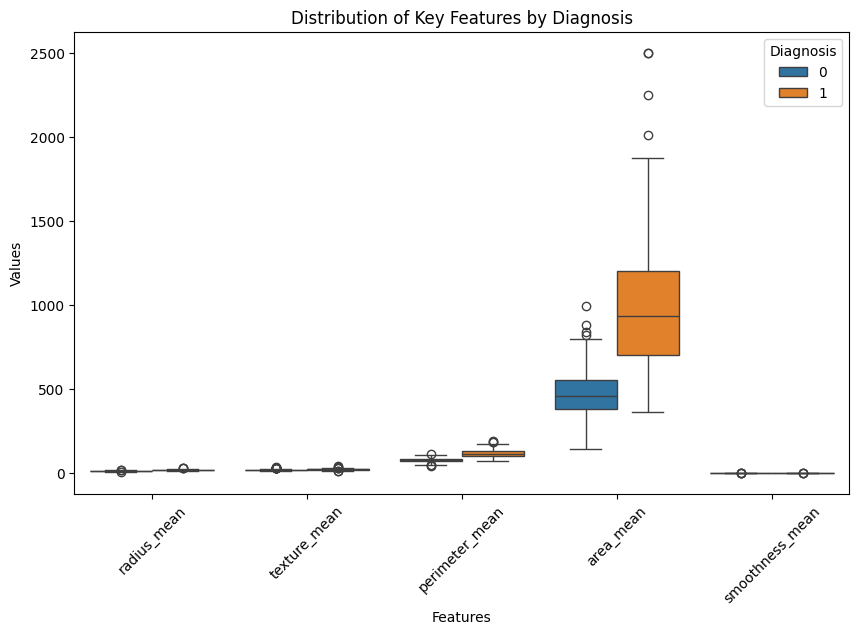

In [10]:
plt.figure(figsize=(10, 6))
key_features = ['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean', 'smoothness_mean']
df_melted = df.melt(id_vars='diagnosis', value_vars=key_features, var_name='Features', value_name='Values')
sns.boxplot(data=df_melted, x='Features', y='Values', hue='diagnosis')
plt.title("Distribution of Key Features by Diagnosis")
plt.xlabel("Features")
plt.ylabel("Values")
plt.legend(title="Diagnosis", loc='upper right')
plt.xticks(rotation=45)
plt.savefig('figures/boxplot_features.png')
plt.show()

Separate Feature and Label

In [11]:
X = df.drop(columns=["diagnosis"])
y = df["diagnosis"]

Feature Standardization

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Split Data Train and Test set

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [14]:
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (455, 30)
Shape of y_train: (455,)
Shape of X_test: (114, 30)
Shape of y_test: (114,)


Grid Search and Training

In [15]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np

# Parameter grid for hyperparameter tuning
param_grid = {
    'learn_rate': [0.001, 0.01, 0.1, 0.2, 0.3, 0.5, 0.7],
    'max_epoch': [100, 500, 1000],
    'layer_conf': [[30, 20, 1], [30, 30, 20, 1]],
    'max_error': [0.01, 0.05, 0.1]
}

# Store results for each combination of parameters
results = []

# Iterate over different configurations of learning rate and layer configurations
for lr in param_grid['learn_rate']:
    for conf in param_grid['layer_conf']:
        print(f"Testing configuration: {conf} with learning rate: {lr}")

        # Loop for max_epoch and max_error
        for epoch in param_grid['max_epoch']:
            for max_err in param_grid['max_error']:
                
                # Trial loop (for running the model multiple times for robustness)
                for trial in range(1, 6):
                    print(f"Trial {trial} with max_epoch={epoch} and max_error={max_err}")

                    # Initialize KFold for cross-validation
                    kf = KFold(n_splits=5, shuffle=True, random_state=42)
                    
                    cv_results = []  # List to store fold accuracies for this trial
                    mse_per_epoch = []  # List to store MSE per epoch for this trial

                    # Run cross-validation
                    for train_index, test_index in kf.split(X_scaled):
                        X_train, X_test = X_scaled[train_index], X_scaled[test_index]
                        y_train, y_test = y[train_index], y[test_index]

                        # Initialize the model with the current parameter settings
                        model = BackpropagationModel(layer_conf=conf, 
                                                    learn_rate=lr, 
                                                    max_epoch=epoch, 
                                                    max_error=max_err,
                                                    print_per_epoch=0)
                        
                        # Train the model
                        model.fit(X_train, y_train)

                        # Collect MSE history for this fold
                        mse_per_epoch.extend(model.mse_history)  # Collect all MSE values across folds

                        # Get predictions
                        predictions_train = model.predict(X_train)
                        predictions_test = model.predict(X_test)

                        # Threshold continuous predictions to binary (0 or 1)
                        predictions_train = (predictions_train >= 0.5).astype(int)
                        predictions_test = (predictions_test >= 0.5).astype(int)

                        # Calculate accuracies
                        train_accuracy = accuracy_score(y_train, predictions_train)
                        test_accuracy = accuracy_score(y_test, predictions_test)

                        # Append the test accuracy for this fold
                        cv_results.append(test_accuracy)

                    # Calculate the mean accuracy for cross-validation in this trial
                    mean_cv_accuracy = np.mean(cv_results)

                    # Calculate the mean MSE for this trial
                    mean_mse_trial = np.mean(mse_per_epoch)

                    # Store the results
                    results.append({
                        'hidden_layer_sizes': conf,
                        'max_epoch': epoch,
                        'learning_rate_init': lr,
                        'max_error': max_err,
                        'trial': trial,
                        'mean_cv_accuracy': mean_cv_accuracy,
                        'train_accuracy': train_accuracy,  # Last fold train accuracy
                        'test_accuracy': test_accuracy,  # Last fold test accuracy
                        'mean_mse_per_trial': mean_mse_trial,  # Rata-rata MSE untuk trial ini
                    })


Testing configuration: [30, 20, 1] with learning rate: 0.001
Trial 1 with max_epoch=100 and max_error=0.01
Epoch 100, MSE: 0.120350
Epoch 100, MSE: 0.119028
Epoch 100, MSE: 0.115254
Epoch 100, MSE: 0.118414
Epoch 100, MSE: 0.115703
Trial 2 with max_epoch=100 and max_error=0.01
Epoch 100, MSE: 0.120350
Epoch 100, MSE: 0.119028
Epoch 100, MSE: 0.115254
Epoch 100, MSE: 0.118414
Epoch 100, MSE: 0.115703
Trial 3 with max_epoch=100 and max_error=0.01
Epoch 100, MSE: 0.120350
Epoch 100, MSE: 0.119028
Epoch 100, MSE: 0.115254
Epoch 100, MSE: 0.118414
Epoch 100, MSE: 0.115703
Trial 4 with max_epoch=100 and max_error=0.01
Epoch 100, MSE: 0.120350
Epoch 100, MSE: 0.119028
Epoch 100, MSE: 0.115254
Epoch 100, MSE: 0.118414
Epoch 100, MSE: 0.115703
Trial 5 with max_epoch=100 and max_error=0.01
Epoch 100, MSE: 0.120350
Epoch 100, MSE: 0.119028
Epoch 100, MSE: 0.115254
Epoch 100, MSE: 0.118414
Epoch 100, MSE: 0.115703
Trial 1 with max_epoch=100 and max_error=0.05
Epoch 100, MSE: 0.120350
Epoch 100, MS

In [16]:
results_df = pd.DataFrame(results)
results_df.to_csv('../projek-jst/data/model_results.csv', index=False)

In [17]:
best_model = results_df.loc[results_df['mean_cv_accuracy'].idxmax()]
print("Best model configuration:")
print(best_model)

Best model configuration:
hidden_layer_sizes    [30, 30, 20, 1]
max_epoch                         500
learning_rate_init               0.01
max_error                        0.01
trial                               1
mean_cv_accuracy             0.984179
train_accuracy               0.991228
test_accuracy                0.982301
mean_mse_per_trial           0.045699
Name: 150, dtype: object


Pengaruh learning rate terhadap accuracy

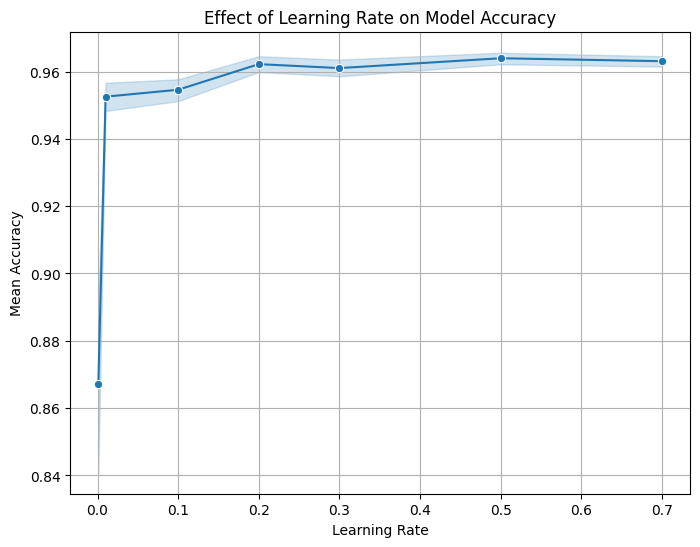

In [18]:
plt.figure(figsize=(8, 6))
sns.lineplot(x='learning_rate_init', y='mean_cv_accuracy', data=results_df, marker='o')
plt.title('Effect of Learning Rate on Model Accuracy')
plt.xlabel('Learning Rate')
plt.ylabel('Mean Accuracy')
plt.grid(True)
plt.savefig('../projek-jst/figures/learning_rate_vs_accuracy.png')
plt.show()

In [19]:
best_conf = best_model['hidden_layer_sizes']
best_lr = best_model['learning_rate_init']
best_epoch = best_model['max_epoch']
best_max_error = best_model['max_error']
print(f"Best model configuration: {best_conf}")
print(f"Best learning rate: {best_lr}")
print(f"Best max epoch: {best_epoch}")
print(f"Best max error: {best_max_error}")

# train the best model
best_model_instance = BackpropagationModel(layer_conf=best_conf, 
                                           learn_rate=best_lr, 
                                           max_epoch=best_epoch, 
                                           max_error=best_max_error)
best_model_instance.fit(X_train, y_train)

Best model configuration: [30, 30, 20, 1]
Best learning rate: 0.01
Best max epoch: 500
Best max error: 0.01
Epoch 100, MSE: 0.040930
Epoch 200, MSE: 0.016934
Epoch 300, MSE: 0.013277
Epoch 400, MSE: 0.011550
Epoch 500, MSE: 0.010418


BackpropagationModel(layer_conf=[30, 30, 20, 1], learn_rate=0.01, max_epoch=500,
                     max_error=0.01)

Train and Test Accuracy of Best Model

In [20]:
# Predict using the best model
y_pred_best = best_model_instance.predict(X_test)

# Threshold predictions to binary (0 or 1)
y_pred_best_binary = (y_pred_best >= 0.5).astype(int)

# Calculate train and test accuracy
train_accuracy_best = accuracy_score(y_train, (best_model_instance.predict(X_train) >= 0.5).astype(int))
test_accuracy_best = accuracy_score(y_test, y_pred_best_binary)

# Print the classification report for the best model
print("Train Accuracy:", train_accuracy_best)
print("Test Accuracy:", test_accuracy_best)
print("Classification Report for Best Model:")
print(classification_report(y_test, y_pred_best_binary))

Train Accuracy: 0.9912280701754386
Test Accuracy: 0.9823008849557522
Classification Report for Best Model:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        67
           1       1.00      0.96      0.98        46

    accuracy                           0.98       113
   macro avg       0.99      0.98      0.98       113
weighted avg       0.98      0.98      0.98       113



In [ ]:
# ROC-AUC Score and Curve for Best Model
y_prob_best = best_model_instance.bp_predict(X_test)
if len(np.unique(y_test)) == 2:
    fpr, tpr, _ = roc_curve(y_test, y_prob_best[:, 0])
    roc_auc_best = auc(fpr, tpr)
    print(f"Best model ROC-AUC Score: {roc_auc_best:.4f}")

    plt.figure()
    plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc_best:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristic (Best Model)")
    plt.legend(loc="lower right")
    plt.savefig('../projek-jst/figures/roc_auc_best_model.png')
    plt.show()

AttributeError: 'BackpropagationModel' object has no attribute 'bp_predict'

Save Model

In [39]:
model_filename = './models/best_backpropagation.pkl'
with open(model_filename, 'wb') as file:
    pickle.dump(best_model_instance, file)

print(f"Best model saved to {model_filename}")

Best model saved to ./models/best_backpropagation.pkl


Load Model

In [41]:
with open(model_filename, 'rb') as file:
    loaded_model = pickle.load(file)